## Практическое задание

<ol>
    <li>Попробуйте обучить, нейронную сеть на Keras(рассмотренную на уроке) на датасете MNIST с другими параметрами. 
        Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?</li>
    <li>Поработайте с документацией Keras. Попробуйте найти полезные команды Keras неразобранные на уроке.</li>
</ol>

In [2]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

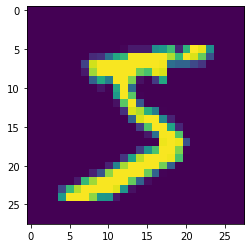

In [7]:
plt.imshow(mnist.train_images()[0])

## Модель с урока 

In [9]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),  #аргумент input_shape задает вид входных данных, необходим для 1-го слоя. альтерантивно можно создать отдельный слой inout перед первым полносвяным
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3564 - accuracy: 0.8934
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1833 - accuracy: 0.9437
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1396 - accuracy: 0.9569
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9628
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9675
[7 2 1 0 4]
[7 2 1 0 4]


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


## Модель 1

In [19]:
model1 = Sequential([
  Dense(128, activation='relu', input_shape=(784,)),  #аргумент input_shape задает вид входных данных, необходим для 1-го слоя. альтерантивно можно создать отдельный слой inout перед первым полносвяным
  Dense(110, activation='relu'),
  Dense(100, activation='relu'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model1.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model1.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
)

# Evaluate the model.
model1.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model1.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model1.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3104 - accuracy: 0.9036
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1527 - accuracy: 0.9525
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1196 - accuracy: 0.9628
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0990 - accuracy: 0.9688
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9675
[7 2 1 0 4]
[7 2 1 0 4]


In [25]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 110)               14190     
                                                                 
 dense_5 (Dense)             (None, 100)               11100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


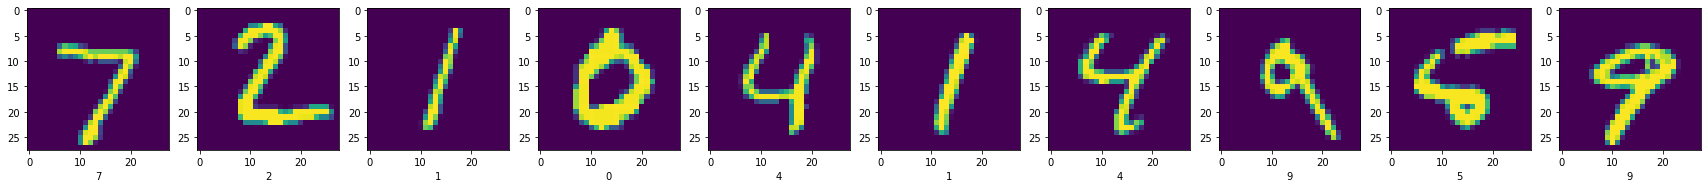

In [24]:
N = 10
y_pred = model1.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

## Модель 2

In [26]:
model2 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'),
  Dense(100, activation='tanh'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model2.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model2.fit(
  train_images,
  to_categorical(train_labels),
  epochs=3,
  batch_size=32,
)

# Evaluate the model.
model2.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model2.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model2.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9113
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1534 - accuracy: 0.9523
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.1206 - accuracy: 0.9620
[7 2 1 0 4]
[7 2 1 0 4]


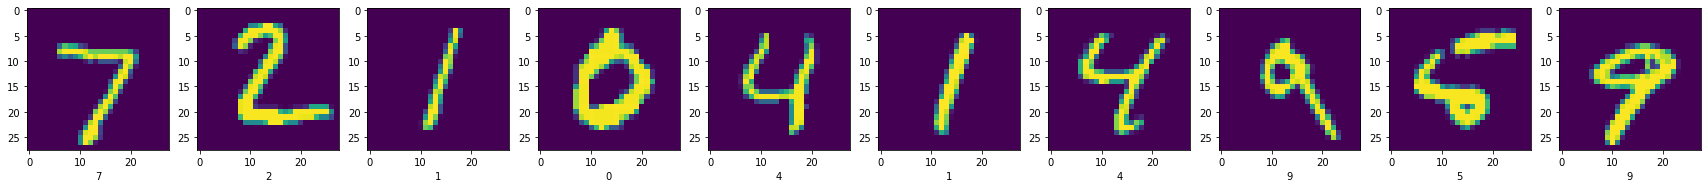

In [27]:
N = 10
y_pred = model2.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

## Модель 3

In [28]:
model3 = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'),
  Dense(100, activation='tanh'),
  Dense(10, activation='softmax'),
])

# Compile the model.
model3.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Train the model.
model3.fit(
  train_images,
  to_categorical(train_labels),
  epochs=15,
  batch_size=1024,
)

# Evaluate the model.
model3.evaluate(
  test_images,
  to_categorical(test_labels)
)

# Save the model to disk.
model3.save_weights('model.h5')

# Load the model from disk later using:
# model.load_weights('model.h5')

# Predict on the first 5 test images.
predictions = model3.predict(test_images[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:5]) # [7, 2, 1, 0, 4]

Epoch 1/15
59/59 [==============================] - 1s 5ms/step - loss: 0.7636 - accuracy: 0.7935
Epoch 2/15
59/59 [==============================] - 0s 5ms/step - loss: 0.2996 - accuracy: 0.9129
Epoch 3/15
59/59 [==============================] - 0s 5ms/step - loss: 0.2384 - accuracy: 0.9296
Epoch 4/15
59/59 [==============================] - 0s 5ms/step - loss: 0.1959 - accuracy: 0.9422
Epoch 5/15
59/59 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9504
Epoch 6/15
59/59 [==============================] - 0s 5ms/step - loss: 0.1416 - accuracy: 0.9581
Epoch 7/15
59/59 [==============================] - 0s 5ms/step - loss: 0.1229 - accuracy: 0.9637
Epoch 8/15
59/59 [==============================] - 0s 5ms/step - loss: 0.1057 - accuracy: 0.9684
Epoch 9/15
59/59 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.9714
Epoch 10/15
59/59 [==============================] - 0s 5ms/step - loss: 0.0847 - accuracy: 0.9758
Epoch 11/15
59/59 [

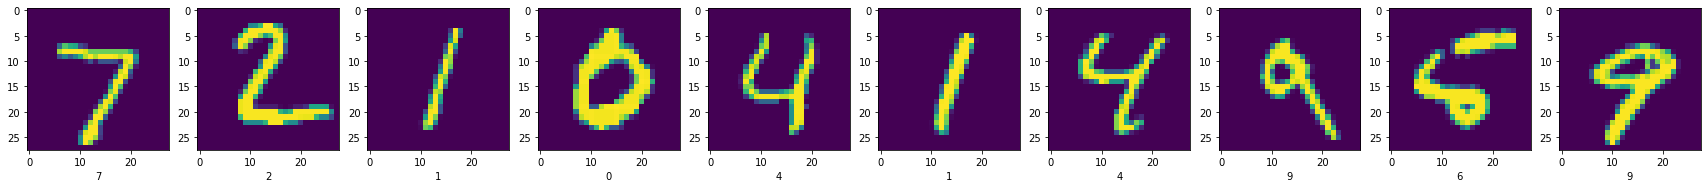

In [29]:
N = 10
y_pred = model3.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  

##Вывод

Увеличив кол-во слоёв, кол-во эпох и бачей модель стала точнее. Но если увеличивать и далее модель переобучится. 